In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mini Project 1 : Basics of NLP: Text Cleaning & Vectorization# New Section

In [ ]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data



In [ ]:
# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# to create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# to split data into train and test sets
from sklearn.model_selection import train_test_split

# to build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# to compute metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# To tune different models
from sklearn.model_selection import GridSearchCV


Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

folder_path = "/content/drive/MyDrive/"
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if "Product_Reviews.csv" in file:
            print(os.path.join(root, file))


/content/drive/MyDrive/LLM ad GenAi/miniproject2/Copy of Product_Reviews.csv
/content/drive/MyDrive/LLM ad GenAi/miniproject1/Product_Reviews.csv


In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/LLM ad GenAi/miniproject1/Product_Reviews.csv"
reviews = pd.read_csv(file_path)
data = reviews.copy()


In [ ]:
# dropping duplicate values
data = data.drop_duplicates()

data.duplicated().sum()



np.int64(0)

<Axes: xlabel='Sentiment', ylabel='count'>

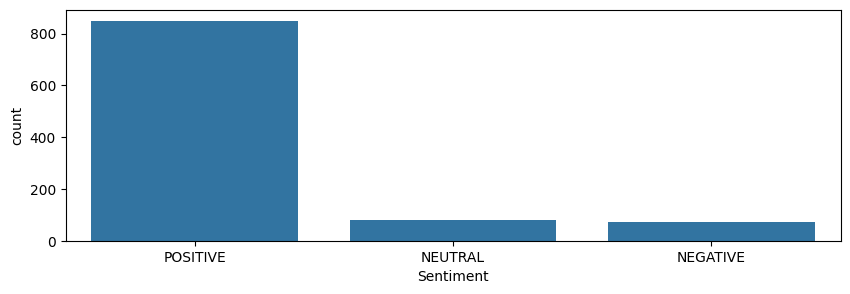

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(data=data, x="Sentiment")


In [ ]:
# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text
# Applying the function to remove special characters
data['cleaned_text'] = data['Product Review'].apply(remove_special_characters)


In [ ]:
# removing extra whitespaces from the text
data['cleaned_text'] = data['cleaned_text'].str.strip()


Removing stopwords
•	The idea with stop word removal is to exclude words that appear frequently throughout all the documents in the corpus.
•	Pronouns and articles are typically categorized as stop words.
•	The NLTK library has an in-built list of stop words and it can utilize that list to remove the stop words from a dataset.


In [ ]:
# defining a function to remove stop words using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

# Applying the function to remove stop words using the NLTK library
data['cleaned_text_without_stopwords'] = data['cleaned_text'].apply(remove_stopwords)


•	Stemming: Quick, crude chopping of word ends. Fast but less accurate.
•	Lemmatization: Smart, linguistic reduction to base form. Slower but more accurate.


In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Importing PorterStemmer
from nltk.stem import PorterStemmer

# Creating a stemmer object
ps = PorterStemmer()

# Function to apply stemming
def apply_porter_stemmer(text):
    words = text.split()
    new_text = ' '.join([ps.stem(word) for word in words])
    return new_text

# Applying it to your column
data['final_cleaned_text'] = data['cleaned_text_without_stopwords'].apply(apply_porter_stemmer)


In [ ]:
data.head(2)

,Product ID,Product Review,Sentiment,cleaned_text,cleaned_text_without_stopwords,final_cleaned_text
0,AVpe7AsMilAPnD_xQ78G,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",POSITIVE,I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage Fortunately I had friends who owned each so I ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment It s been a week and I am loving my paperwhite no regrets The touch screen is receptive and easy to use and I keep the light at a specific setting regardless of the time of day In any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading Also glad that I went for the international shipping option with Amazon Extra expense but delivery was on time with tracking and I didnt need to worry about customs which I may have if I used a third party shipping service,I initially trouble deciding paperwhite voyage reviews less said thing paperwhite great spending money go voyage Fortunately I friends owned I ended buying paperwhite basis models 300 ppi 80 dollar jump turns pricey voyage page press always sensitive fine specific setting need auto light adjustment It week I loving paperwhite regrets The touch screen receptive easy use I keep light specific setting regardless time day In case hard change setting either changing light level certain time day every reading Also glad I went international shipping option Amazon Extra expense delivery time tracking I didnt need worry customs I may I used third party shipping service,i initi troubl decid paperwhit voyag review less said thing paperwhit great spend money go voyag fortun i friend own i end buy paperwhit basi model 300 ppi 80 dollar jump turn pricey voyag page press alway sensit fine specif set need auto light adjust it week i love paperwhit regret the touch screen recept easi use i keep light specif set regardless time day in case hard chang set either chang light level certain time day everi read also glad i went intern ship option amazon extra expens deliveri time track i didnt need worri custom i may i use third parti ship servic
1,AVpe7AsMilAPnD_xQ78G,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again!

In [ ]:
# Initializing CountVectorizer with top 1000 words
bow_vec = CountVectorizer(max_features = 1000)

# Applying CountVectorizer on data
data_features_BOW = bow_vec.fit_transform(data['final_cleaned_text'])

# Convert the data features to array
data_features_BOW = data_features_BOW.toarray()

# Shape of the feature vector
print("Shape of the feature vector",data_features_BOW.shape)


Shape of the feature vector (1005, 1000)


In [ ]:
# Getting the 1000 words considered by the BoW model
words = bow_vec.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

# Creating a DataFrame from the data features
df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()


first 10 words ['10' '100' '11' '139' '15' '16' '17' '20' '2013' '2014']
last 10 words ['would' 'write' 'wrong' 'xbox' 'ye' 'year' 'yet' 'you' 'youll' 'youtub']


,10,100,11,139,15,16,17,20,2013,2014,...,would,write,wrong,xbox,ye,year,yet,you,youll,youtub
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


TF-IDF Vectorizer
📘 What is TF-IDF?
TF-IDF is a technique used to convert text data into numerical form so that machine learning models can understand it.
It tells us how important a word is in a document compared to all other documents in the dataset.

🧩 TF-IDF = TF × IDF
Let’s break it into two parts:

✅ 1. TF = Term Frequency
This measures how often a word appears in one document.

Formula:

TF
(
𝑡
)
=
Number of times word
𝑡
 appears in a document
Total words in that document
TF(t)=
Total words in that document
Number of times word t appears in a document
​

🔹 Example:

In the sentence: “AI is the future and AI is powerful”

The word “AI” appears 2 times out of 7 words total →

𝑇
𝐹
(
AI
)
=
2
7
TF(AI)=
7
2
​

✅ 2. IDF = Inverse Document Frequency
This tells us how rare or unique a word is across all documents.

Formula:

IDF
(
𝑡
)
=
log
⁡
(
𝑁
Number of documents containing the word
𝑡
)
IDF(t)=log(
Number of documents containing the word t
N
​
 )
Where:

𝑁
N = Total number of documents

🔹 Example:

If a word appears in every document, its IDF will be low.

If a word appears in only a few documents, its IDF will be high → the word is more unique or important.

🎯 Why Multiply TF and IDF?
Multiplying them gives us:

High value for words that are frequent in one document but rare in others → useful words

Low value for common words like “is”, “the”, “and” → not useful



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing tfidf
tfidf = TfidfVectorizer(max_features=1000,min_df=0.05)

# Applying TfidfVectorizer on data
data_features_tfidf = tfidf.fit_transform(data['final_cleaned_text'])

# Convert the data features to array
data_features_tfidf = data_features_tfidf.toarray()

# Shape of the feature vector
print("Shape of the feature vector",data_features_tfidf.shape)

# Getting the 1000 words considered by the BoW model
words = tfidf.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

# Creating a DataFrame from the data features
df_tfidf = pd.DataFrame(data_features_tfidf, columns=tfidf.get_feature_names_out())
df_tfidf.head()


Shape of the feature vector (1005, 175)
first 10 words ['abl' 'access' 'ad' 'alexa' 'also' 'alway' 'amaz' 'amazon' 'anoth' 'app']
last 10 words ['way' 'we' 'well' 'wifi' 'without' 'work' 'worth' 'would' 'year' 'you']


,abl,access,ad,alexa,also,alway,amaz,amazon,anoth,app,...,way,we,well,wifi,without,work,worth,would,year,you
0,0.0,0.0,0.0,0.0,0.094492,0.129116,0.0,0.073718,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.065945,0.0,0.000000,...,0.0,0.0,0.086232,0.0,0.000000,0.000000,0.0,0.000000,0.097428,0.108608
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.063150,0.000000,0.0,0.098533,0.0,0.072368,...,0.0,0.0,0.064422,0.0,0.000000,0.053305,0.0,0.116033,0.072787,0.000000
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.208844,0.0,0.000000,...,0.0,0.0,0.054618,0.0,0.065243,0.090386,0.0,0.000000,0.061709,0.000000


**n gram**

🔹 What are n-grams?
An n-gram is a sequence of n words together from a text.

✅ Examples:
Unigram (n = 1):
"AI is great" → ["AI", "is", "great"]

Bigram (n = 2):
"AI is great" → ["AI is", "is great"]

Trigram (n = 3):
"AI is great" → ["AI is great"]

🧠 Why use n-grams?
Captures phrases or patterns in text.

Useful in text classification, language modeling, sentiment analysis, etc.

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer (BoW) with top 1000 words, min 5% doc frequency
ngram = CountVectorizer(max_features=1000, min_df=0.05)

# Fit and transform the text data
data_features_ngram = ngram.fit_transform(data['final_cleaned_text'])

# Convert to array
data_features_ngram = data_features_ngram.toarray()

# Print shape of the feature matrix
print("Shape of the feature vector:", data_features_ngram.shape)

# Get selected words/phrases
words = ngram.get_feature_names_out()

# Show first and last 10 words
print("First 10 words/phrases:", words[:10])
print("Last 10 words/phrases:", words[-10:])

# Create DataFrame from features
df_ngram = pd.DataFrame(data_features_ngram, columns=words)

# Show first 5 rows
df_ngram.head()


Shape of the feature vector: (1005, 175)
First 10 words/phrases: ['abl' 'access' 'ad' 'alexa' 'also' 'alway' 'amaz' 'amazon' 'anoth' 'app']
Last 10 words/phrases: ['way' 'we' 'well' 'wifi' 'without' 'work' 'worth' 'would' 'year' 'you']


,abl,access,ad,alexa,also,alway,amaz,amazon,anoth,app,...,way,we,well,wifi,without,work,worth,would,year,you
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,2,0,1,...,0,0,1,0,0,1,0,2,1,0
4,0,0,0,0,0,0,0,5,0,0,...,0,0,1,0,1,2,0,0,1,0


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Create a list of datasets and their labels
vectorized_datasets = [
    ("BoW", df_BOW),
    ("TF-IDF", df_tfidf),
    ("N-gram", df_ngram)
]

# Define target variable
y = data['Sentiment']


In [ ]:
# To store results
results = []

# Loop over each dataset
for name, X in vectorized_datasets:
    # Split the dataset into training and test sets (80/20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

    # Train Random Forest Classifier
    rf_model = RandomForestClassifier(random_state=100)
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)
    rf_f1 = f1_score(y_test, rf_preds, average='macro')

    results.append((f"RandomForest - {name}", rf_f1, rf_model, X_test, y_test, rf_preds))

    # Train Multinomial Naive Bayes
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    nb_preds = nb_model.predict(X_test)
    nb_f1 = f1_score(y_test, nb_preds, average='macro')

    results.append((f"NaiveBayes - {name}", nb_f1, nb_model, X_test, y_test, nb_preds))


In [ ]:
# Sort results by F1-score (descending)
results.sort(key=lambda x: x[1], reverse=True)

# Print all F1 scores
print("\n📊 Model Performance (Macro F1-scores):\n")
for label, f1_score_val, *_ in results:
    print(f"{label:30}: Macro F1 = {f1_score_val:.4f}")



📊 Model Performance (Macro F1-scores):

NaiveBayes - BoW              : Macro F1 = 0.5642
NaiveBayes - N-gram           : Macro F1 = 0.5061
RandomForest - BoW            : Macro F1 = 0.4461
RandomForest - N-gram         : Macro F1 = 0.4461
RandomForest - TF-IDF         : Macro F1 = 0.4403
NaiveBayes - TF-IDF           : Macro F1 = 0.3035


In [ ]:
# Extract the best model and its results
best_model_label, best_f1, best_model, X_test_best, y_test_best, y_pred_best = results[0]

print(f"\n✅ Best Model: {best_model_label} (Macro F1 = {best_f1:.4f})\n")
print("Classification Report:\n")
print(classification_report(y_test_best, y_pred_best))



✅ Best Model: NaiveBayes - BoW (Macro F1 = 0.5642)

Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.47      0.50      0.48        16
     NEUTRAL       0.31      0.29      0.30        17
    POSITIVE       0.90      0.90      0.90       168

    accuracy                           0.82       201
   macro avg       0.56      0.57      0.56       201
weighted avg       0.82      0.82      0.82       201




✅ Best Model: NaiveBayes - BoW (Macro F1 = 0.5642)

Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.47      0.50      0.48        16
     NEUTRAL       0.31      0.29      0.30        17
    POSITIVE       0.90      0.90      0.90       168

    accuracy                           0.82       201
   macro avg       0.56      0.57      0.56       201
weighted avg       0.82      0.82      0.82       201



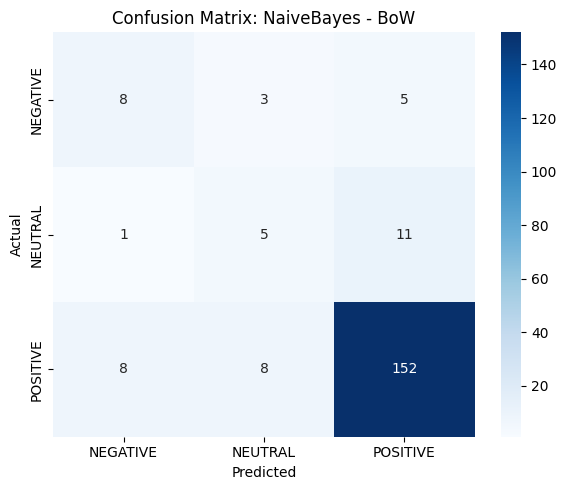

In [ ]:
best_model_label, best_f1, best_model, X_test_best, y_test_best, y_pred_best = results[0]

print(f"\n✅ Best Model: {best_model_label} (Macro F1 = {best_f1:.4f})\n")
print("Classification Report:\n")
print(classification_report(y_test_best, y_pred_best))

# Plot Confusion Matrix
cm = confusion_matrix(y_test_best, y_pred_best, labels=best_model.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title(f"Confusion Matrix: {best_model_label}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


✅ Best Model: NaiveBayes - BoW (Macro F1 = 0.5642)

Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.47      0.50      0.48        16
     NEUTRAL       0.31      0.29      0.30        17
    POSITIVE       0.90      0.90      0.90       168

    accuracy                           0.82       201
   macro avg       0.56      0.57      0.56       201
weighted avg       0.82      0.82      0.82       201



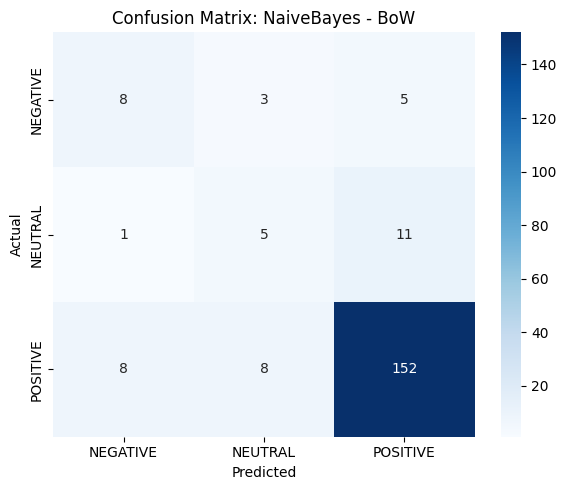

In [ ]:
# Best model
best_model_label, best_f1, best_model, X_test_best, y_test_best, y_pred_best = results[0]

print(f"\n✅ Best Model: {best_model_label} (Macro F1 = {best_f1:.4f})\n")
print("Classification Report:\n")
print(classification_report(y_test_best, y_pred_best))

# Plot Confusion Matrix
cm = confusion_matrix(y_test_best, y_pred_best, labels=best_model.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title(f"Confusion Matrix: {best_model_label}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
!pip install gensim

# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# to create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# to import Word2Vec
from gensim.models import Word2Vec

# to split data into train and test sets
from sklearn.model_selection import train_test_split

# to build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# to compute metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# To tune different models
from sklearn.model_selection import GridSearchCV



# Example CBOW
# Note-
  # sg=0 → model is trained to predict target word from context (CBOW)
  # sg=1 → model is trained to predict context words from target (Skip-gram)

from gensim.models import Word2Vec

# Define corpus
sentences = [
    ["the", "cat", "sat", "on", "the", "mat"],
    ["the", "dog", "sat", "on", "the", "rug"],
    ["cats", "and", "dogs", "are", "friends"],
    ["the", "puppy", "played", "with", "the", "ball"],
    ["the", "kitten", "played", "with", "the", "yarn"]
]


# CBOW model (sg=0 for CBOW, sg=1 for skip-gram)
cbow_model = Word2Vec(sentences, vector_size=10, window=2, min_count=1, sg=0)
"""
PARAMETERS:
1. vector_size=10
What it means: Number of dimensions in the word vector.
Example: "cat" → [0.12, -0.56, 0.91, ...] (10 numbers)
Tip: Bigger vectors can store more meaning but need more data & computation.

2. window=2
What it means: How many words before & after the target word are considered context.
Example: In "The cat sat on the mat",
if target = "sat", window=2 → context = "cat", "on", "the", "mat".
Tip:
Small window → local grammar relationships
Large window → broader semantic relationships

3. min_count=1
What it means: Minimum word frequency to be included in the vocabulary.
Example:
min_count=1 → keep all words (good for small datasets)
min_count=5 → ignore words that appear fewer than 5 times (good for large datasets).
Tip: Helps remove rare, noisy words in big corpora.

4. sg=0 or sg=1
What it means: Chooses the training algorithm.
sg=0 → CBOW (predict target word from context)
sg=1 → Skip-gram (predict context words from target)
Example:
CBOW: "cat", "on" → "sat"
Skip-gram: "sat" → "cat", "on"
Tip:
CBOW is faster & works well with frequent words.
Skip-gram is slower but works better with rare words.

5. workers
What it means: Number of CPU threads to use in training.
Word2Vec can process multiple parts of the training data in parallel to speed things up.
Example:
workers=1 → use only 1 CPU core (slower, but deterministic results)
workers=4 → use 4 CPU cores (faster)
Tip:
On your personal machine, you can set it to the number of cores you have.
On Colab / Jupyter with small datasets, it won’t matter much — but for huge corpora, it makes training much faster."""

# Vector for a word
print("Vector for 'cat':")
print(cbow_model.wv['cat'])

# Similar words to 'cat'
print("\nWords similar to 'cat'and the cosine of angles between those vectors:")
print(cbow_model.wv.most_similar('cat'))



Vector for 'cat':
[-0.01577653  0.00321372 -0.0414063  -0.07682689 -0.01508008  0.02469795
 -0.00888027  0.05533662 -0.02742977  0.02260065]

Words similar to 'cat'and the cosine of angles between those vectors:
[('on', 0.6143978834152222), ('dogs', 0.3862057328224182), ('are', 0.22020560503005981), ('mat', 0.19734424352645874), ('friends', 0.1793583482503891), ('ball', 0.166447713971138), ('puppy', 0.12150698155164719), ('kitten', 0.11524442583322525), ('cats', -0.04264536499977112), ('played', -0.08937527239322662)]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Step 1 — Tokenize the text
sentences = data['final_cleaned_text'].apply(lambda x: x.split())  # assuming text is already cleaned

# Step 2 — Train CBOW Model (sg=0)
cbow_model = Word2Vec(
    sentences,
    vector_size=100,  # length of each word vector
    window=3,         # context window size
    min_count=5,      # include all words
    sg=0,             # CBOW
    workers=4         # CPU cores to use
)

# Step 3 — Train Skip-gram Model (sg=1)
skipgram_model = Word2Vec(
    sentences,
    vector_size=100,
    window=3,
    min_count=5,
    sg=1,             # Skip-gram
    workers=4
)

# Step 4 — Function to get sentence vectors
def get_sentence_vector(model, tokens):
    word_vecs = [model.wv[word] for word in tokens if word in model.wv]
    if len(word_vecs) == 0:
        return np.zeros(model.vector_size)  # handle empty sentences
    return np.mean(word_vecs, axis=0)

# Step 5 — Apply to dataset

# CBOW Vectors
data_cbow_vectors = np.array([get_sentence_vector(cbow_model, tokens) for tokens in sentences])
# Skip-gram Vectors
data_skipgram_vectors = np.array([get_sentence_vector(skipgram_model, tokens) for tokens in sentences])

# Step 6 — Convert to DataFrames (optional)
df_cbow = pd.DataFrame(data_cbow_vectors)
df_skipgram = pd.DataFrame(data_skipgram_vectors)



# Checking top 5 similar words to the word 'book' by cbow_model & skipgram_model
print("CBOW:",cbow_model.wv.similar_by_word('book', topn=5))
print("SkipGram:",skipgram_model.wv.similar_by_word('book', topn=5))



from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = '/content/drive/MyDrive/LLM ad GenAi/miniproject2/glove.6B.100d.txt.word2vec'

glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)


# Checking top 5 similar words to the word 'book' by GloVe model
print("word embedding of word book", glove_model['book'])
print("GloVe:",glove_model.similar_by_word('book', topn=5))



#List of words in the whole vocabulary of GloVe
words = glove_model.index_to_key

#Dictionary with key as the word and the value as the corresponding embedding vector.
word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

#Defining the dimension of the embedded vector.
vec_size=100

def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in our reviews that are present in the GloVe vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector= feature_vector/len(words_in_vocab)

    return feature_vector

    # creating a dataframe of the vectorized documents
df_glove = pd.DataFrame(data['final_cleaned_text'].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_glove


import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
# Create a list of datasets and their labels
vectorized_datasets = [
    ("BoW", df_BOW),
     ("GloVe", df_glove),
    ("word2Vec_cbow",df_cbow),
    ("skipgram",df_skipgram)
]

# Your target variable
y = data['Sentiment']

# Store results
results = []

# Loop over each dataset and train both classifiers
for name, X in vectorized_datasets:
    # Split data (80/20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

    # Random Forest
    rf_model = RandomForestClassifier(random_state=100)
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)
    rf_f1 = f1_score(y_test, rf_preds, average='macro')
    results.append((f"RandomForest - {name}", rf_f1, rf_model, X_test, y_test, rf_preds))

    """# Multinomial Naive Bayes
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    nb_preds = nb_model.predict(X_test)
    nb_f1 = f1_score(y_test, nb_preds, average='macro')
    results.append((f"NaiveBayes - {name}", nb_f1, nb_model, X_test, y_test, nb_preds))"""

    # Gradient Boosting
    from sklearn.ensemble import GradientBoostingClassifier
    gboost = GradientBoostingClassifier(random_state=100)
    gboost.fit(X_train, y_train)
    gb_preds = gboost.predict(X_test)
    gb_f1 = f1_score(y_test, gb_preds, average='macro')
    results.append((f"Gradient Boost - {name}", gb_f1, gboost, X_test, y_test, gb_preds))

    # Ada Boosting
    from sklearn.ensemble import AdaBoostClassifier
    ada = AdaBoostClassifier()
    ada.fit(X_train, y_train)
    ada_preds = ada.predict(X_test)
    ada_f1 = f1_score(y_test, ada_preds, average='macro')
    results.append((f"Adaptive Boost - {name}", ada_f1, ada, X_test, y_test, ada_preds))





# Sort results by F1 score (descending)
results.sort(key=lambda x: x[1], reverse=True)

# Print all F1 scores
print("\n📊 Model Performance (Macro F1-scores):\n")
for label, f1_score_val, _, _, _, _ in results:
    print(f"{label:30s}: Macro F1 = {f1_score_val:.4f}")




CBOW: [('around', 0.9988279938697815), ('processor', 0.9987737536430359), ('watching', 0.9987511038780212), ('reading', 0.9987430572509766), ('experience', 0.9987269043922424)]
SkipGram: [('buying', 0.9507865905761719), ('money', 0.950178861618042), ('sitting', 0.949830174446106), ('experience', 0.9471299648284912), ('reading', 0.9465487599372864)]
word embedding of word book [-1.9744e-01  4.4831e-01  1.3689e-01 -1.5595e-01  9.3600e-01  7.2986e-01
  3.4099e-01 -3.3896e-01 -8.9569e-02 -4.7706e-01  3.5112e-01 -4.2198e-01
 -1.2221e-01 -6.3375e-02 -4.5820e-01  7.8723e-01  9.4045e-01  8.1101e-02
 -2.3224e-01  4.0778e-01  3.3258e-01 -4.4458e-01 -4.7117e-01  1.4852e-01
  9.6308e-01 -6.5267e-02 -5.3661e-02 -6.7474e-01 -4.2364e-01  9.4392e-02
 -3.8668e-01  1.8237e-01 -1.2846e-01 -2.1952e-01 -5.8993e-01  7.3602e-01
 -2.4009e-01  3.2392e-01 -2.4663e-01 -4.0684e-01 -5.2468e-01  4.6174e-01
 -1.4936e-01 -1.1999e-01 -1.3990e-01 -4.4944e-01 -2.6565e-01 -7.0061e-01
  3.0188e-01 -1.1209e-01  6.6323e-01 